# SOC Baseline LEAFs
This notebook documents the generation of currently available SOC LEAFs for SBTN Land v2 Land Quality Target. Full documentaion of the SOC model can be found on [SOC_Documentation](../documentation/SOC_Documentation.md) and an example of how to generate new crop SOC LEAFs on [SOC_LEAF_Example](../examples/SOC_LEAF_Example.ipynb).

Here, LEAFs are generated for 1) annual crops, 2) permanent crops, and 3) forest & grassland land uses. As model generate annual outputs, only the end year is preserved, in this case 2030.

## Step 1 - Data Gathering and Preparation
As explained in SOC Documentation, several data layers need to be gathered.

### 1.1 - Soil & Weather
Precipitation and air temperature data have been downloaded and processed. It be found under [data/](../data/). SoilGrids data have been downloaded and processed into UHTH zones in the needed format and is also available in the same folder.

**🚧 TODO: Update reference 🚧**
This data is too large to be be hosted in a github repository. Instructions into how to download it can be found on XXX

### 1.2 - Commodity Data
#### 1.2.1 - Land use
Land use layers have been adapted from Morais, Teixeria & Domingos (2019) and can be found under [data/land_use/](../data/land_use/). These layers include annual & permanent crops, forestry, and grasslands.

#### 1.2.2 - Annual & Permanent Crops
##### 1.2.2.1 - Yields
Commodity yield input data from FAO has already been summarized and can be found at [data/crops/fao_crop_yields_1423.csv](../data/crops/fao_crop_yields_1423.csv) file. The needed SPAM data has been downloaded into [data/crops/spam2020V2r0_global_yield](data/crops/spam2020V2r0_global_yield) folder. For each run of the RothC model, yields per pixel are stochastically calculated using SPAM and FAO data by averaging 100 normal distribution draws, using the standard deviation per country reported by FAO for each commodity.

##### 1.2.2.2 -Irrigation, crop potential evapotranspiration, and plant cover
Potential evapotranspiration, and thus irrigation, as well as plant cover can are calculated using prepare_crop_data_irrigation_plantcover for a single crop or  `cropcalcs.prepare_crop_scenarios_PET_PlantCover_only` for a series of crops and land management options. All needed data can be found on [data/crops](../data/crops) folder with the exception of SPAM rasters which should be indepedently downloaded.

Calcualtions are performed as follows:

In [1]:
# Loading modules
import sbtn_leaf.RothC_Raster as rothC
from sbtn_leaf.paths import data_path, LEAFs_dir
import sbtn_leaf.map_plotting as maplot
import sbtn_leaf.cropcalcs as cropcalcs

import importlib
import polars as pl

Could not determine dtype for column 1, falling back to string


##### Annual Crops

One crop example

In [5]:
output_crop_folder = "../data/crops/rothc_support"

In [6]:
# Needed filepaths
lu_filepath = "../data/land_use/lu_Irrigated_Maize_residues_left_on_the_field.tif"

In [7]:
# Preparing crop data
cropcalcs.prepare_crop_data_irrigation_plantcover(
    crop_name = "Maize",
    crop_type= "annual",
    crop_practice_string = "irr",
    lu_data_path = lu_filepath,
    output_data_folder = output_crop_folder,
    all_new_files=True
)

Creating PET raster...


C:\Users\loyola\OneDrive - World Wildlife Fund, Inc\Documents\203. Python projects\SBTN_Test\src\sbtn_leaf\data_loader.py:216: DataOrientationWarning: Row orientation inferred during DataFrame construction. Explicitly specify the orientation by passing `orient="row"` to silence this warning.
  table = pl.DataFrame(THERMAL_CLIMATE_ROWS, schema=["id", "TC_Name", "TC_Group"])
Precomputing Kc curves for group: 100%|██████████| 6/6 [00:00<00:00, 72.85it/s]


    Precomputing Kc curve for group: Tropics
    Precomputing Kc curve for group: Subtropics summer rainfall
    Precomputing Kc curve for group: Subtropics winter rainfall
    Precomputing Kc curve for group: Oceanic temperate
    Precomputing Kc curve for group: Sub-continental temperate and continental temperate
    Precomputing Kc curve for group: Sub-continental boreal, continental boreal and polar/arctic


Applying Kc to thremal groups: 100%|██████████| 6/6 [00:00<00:00,  6.10it/s]


PET calculation completed for crop 'Maize' succesfully.
Creating irrigation raster...
Irrigation raster saved to ..\data\crops\rothc_support\Maize_irr_monthly.tif
Creating plant cover raster...
Plant cover raster saved to ..\data\crops\rothc_support\Maize_pc_monthly.tif
Irrigation, PET, and plant cover rasters created for Maize, irr!!!


All permanent crops included

In [9]:
# Filepath
annual_crop_rothc_prep_fp = data_path("crops", "rothc_support", "annual_crop_rothc_dataprep_inventory.csv")

In [36]:
import sbtn_leaf.PET as pet

In [43]:
importlib.reload(cropcalcs)
importlib.reload(pet)

Could not determine dtype for column 1, falling back to string


<module 'sbtn_leaf.PET' from 'C:\\Users\\loyola\\OneDrive - World Wildlife Fund, Inc\\Documents\\203. Python projects\\SBTN_Test\\src\\sbtn_leaf\\PET.py'>

In [44]:
# Preparing rothc needed files
unique_data_prepared = cropcalcs.prepare_crop_scenarios_PET_PlantCover_only(annual_crop_rothc_prep_fp)

Creating a unique list of rasters with different land use maps...

Preparing irrigation and plant cover data for Barley, irr_ron
PET raster already exists. Skipping...
Irrigation raster already exists — skipping computation.
Plant Cover raster already exists — skipping computation.
Irrigation, PET, and plant cover rasters created for Barley, irr_ron!!!
Next!

Preparing irrigation and plant cover data for Barley, irr_roff
PET raster already exists. Skipping...
Irrigation raster already exists — skipping computation.
Plant Cover raster already exists — skipping computation.
Irrigation, PET, and plant cover rasters created for Barley, irr_roff!!!
Next!

Preparing irrigation and plant cover data for Cabbage, irr
PET raster already exists. Skipping...
Irrigation raster already exists — skipping computation.
Plant Cover raster already exists — skipping computation.
Irrigation, PET, and plant cover rasters created for Cabbage, irr!!!
Next!

Preparing irrigation and plant cover data for Carrot

Checking which scenarios were created...

In [48]:
unique_data_prepared.sort_values(by=["crop_name", "crop_practice_string"])

,crop_name,crop_type,crop_practice_string,lu_path,pet_path,irr_path,plantcover_path
1,Barley,annual,irr_roff,../data/land_use/lu_Irrigated_Barley_residues_...,..\data\crops\rothc_support\Barley_irr_roff_pe...,..\data\crops\rothc_support\Barley_irr_roff_ir...,..\data\crops\rothc_support\Barley_irr_roff_pc...
0,Barley,annual,irr_ron,../data/land_use/lu_Irrigated_Barley_residues_...,..\data\crops\rothc_support\Barley_irr_ron_pet...,..\data\crops\rothc_support\Barley_irr_ron_irr...,..\data\crops\rothc_support\Barley_irr_ron_pc_...
24,Barley,annual,rf_roff,../data/land_use/lu_Rainfed_Barley_residues_re...,..\data\crops\rothc_support\Barley_rf_roff_pet...,None,..\data\crops\rothc_support\Barley_rf_roff_pc_...
23,Barley,annual,rf_ron,../data/land_use/lu_Rainfed_Barley_residues_le...,..\data\crops\rothc_support\Barley_rf_ron_pet_...,None,..\data\crops\rothc_support\Barley_rf_ron_pc_m...
2,Cabbage,annual,irr,../data/land_use/lu_Irrigated_Cabbages.tif,..\data\crops\rothc_support\Cabbage_irr_pet_mo...,..\data\crops\rothc_support\Cabbage_irr_irr_mo...,..\data\crops\rothc_support\Cabbage_irr_pc_mon...
3,Carrot,annual,irr,../data/land_use/lu_Irrigated_Carrots.tif,..\data\crops\rothc_support\Carrot_irr_pet_mon...,..\data\crops\rothc_support\Carrot_irr_irr_mon...,..\data\crops\rothc_support\Carrot_irr_pc_mont...
4,Cotton,annual,irr,../data/land_use/lu_Irrigated_cotton.tif,..\data\crops\rothc_support\Cotton_irr_pet_mon...,..\data\crops\rothc_support\Cotton_irr_irr_mon...,..\data\crops\rothc_support\Cotton_irr_pc_mont...
25,Cotton,annual,rf,../data/land_use/lu_Rainfed_cotton.tif,..\data\crops\rothc_support\Cotton_rf_pet_mont...,None,..\data\crops\rothc_support\Cotton_rf_pc_month...
5,Groundnut,annual,irr,../data/land_use/lu_Irrigated_Groundnuts.tif,..\data\crops\rothc_support\Groundnut_irr_pet_...,..\data\crops\rothc_support\Groundnut_irr_irr_...,..\data\crops\rothc_support\Groundnut_irr_pc_m...
7,Maize,annual,irr_roff,../data/land_use/lu_Irrigated_Maize_residues_r...,..\data\crops\rothc_support\Maize_irr_roff_pet...,..\data\crops\rothc_support\Maize_irr_roff_irr...,..\data\crops\rothc_support\Maize_irr_roff_pc_...


Saving it to create easily the next set of data for rothC runs...

In [50]:
unique_data_prepared.to_csv("../data/crops/rothc_support/annual_crops_data_path.csv", sep=";", index=False)

##### Permanent Crops

One crop example

In [ ]:
# Needed filepaths
lu_filepath = "../data/land_use/lu_Irrigated_Coffee.tif"
spam_coffee_all = "../data/crops/spam2020V2r0_global_yield/spam2020_V2r0_global_Y_COFF_A.tif"
spam_coffee_irr = "../data/crops/spam2020V2r0_global_yield/spam2020_V2r0_global_Y_COFF_I.tif"
spam_coffee_rain = "../data/crops/spam2020V2r0_global_yield/spam2020_V2r0_global_Y_COFF_R.tif"

In [80]:
cropcalcs.prepare_crop_data_irrigation_plantcover(
    crop_name = "Coffee",
    crop_type= "permanent",
    crop_practice_string = "irr",
    lu_data_path = lu_filepath,
    output_data_folder = output_crop_folder,
    all_new_files=True
)

Creating PET raster...


Precomputing Kc curves for group: 100%|██████████| 6/6 [00:00<00:00, 68.92it/s]


    Precomputing Kc curve for group: Tropics
    Precomputing Kc curve for group: Subtropics summer rainfall
    Precomputing Kc curve for group: Subtropics winter rainfall
    Precomputing Kc curve for group: Oceanic temperate
    Precomputing Kc curve for group: Sub-continental temperate and continental temperate
    Precomputing Kc curve for group: Sub-continental boreal, continental boreal and polar/arctic


Applying Kc to thremal groups: 100%|██████████| 6/6 [00:00<00:00, 18.17it/s]


PET calculation completed for crop 'Coffee' succesfully.
Creating irrigation raster...
Irrigation raster saved to ..\data\crops\rothc_support\Coffee_irr_monthly.tif
Creating plant cover raster...
Plant cover raster saved to ..\data\crops\rothc_support\Coffee_pc_monthly.tif
Irrigation, PET, and plant cover rasters created for Coffee, irr!!!


All permanent crops included

In [97]:
permanent_crop_rothc_prep_fp = data_path("crops", "rothc_support", "permanent_crop_rothc_dataprep_inventory.csv")

In [99]:
cropcalcs.prepare_crop_scenarios_PET_PlantCover_only(permanent_crop_rothc_prep_fp)

Preparing irrigation and plant cover data for Apple, irr
Creating PET raster...


Precomputing Kc curves for group: 100%|██████████| 6/6 [00:00<00:00, 201.36it/s]


    Precomputing Kc curve for group: Tropics
    Precomputing Kc curve for group: Subtropics summer rainfall
    Precomputing Kc curve for group: Subtropics winter rainfall
    Precomputing Kc curve for group: Oceanic temperate
    Precomputing Kc curve for group: Sub-continental temperate and continental temperate
    Precomputing Kc curve for group: Sub-continental boreal, continental boreal and polar/arctic


Applying Kc to thremal groups: 100%|██████████| 6/6 [00:00<00:00, 16.38it/s]


PET calculation completed for crop 'Apple' succesfully.
Creating irrigation raster...
Irrigation raster saved to ..\data\crops\rothc_support\Apple_irr_monthly.tif
Creating plant cover raster...
Plant cover raster saved to ..\data\crops\rothc_support\Apple_pc_monthly.tif
Irrigation, PET, and plant cover rasters created for Apple, irr!!!
Next!

Preparing irrigation and plant cover data for Banana, irr
Creating PET raster...


Precomputing Kc curves for group: 100%|██████████| 6/6 [00:00<00:00, 293.68it/s]


    Precomputing Kc curve for group: Tropics
    Precomputing Kc curve for group: Subtropics summer rainfall
    Precomputing Kc curve for group: Subtropics winter rainfall
    Precomputing Kc curve for group: Oceanic temperate
    Precomputing Kc curve for group: Sub-continental temperate and continental temperate
    Precomputing Kc curve for group: Sub-continental boreal, continental boreal and polar/arctic


Applying Kc to thremal groups: 100%|██████████| 6/6 [00:00<00:00, 20.62it/s]


PET calculation completed for crop 'Banana' succesfully.
Creating irrigation raster...
Irrigation raster saved to ..\data\crops\rothc_support\Banana_irr_monthly.tif
Creating plant cover raster...
Plant cover raster saved to ..\data\crops\rothc_support\Banana_pc_monthly.tif
Irrigation, PET, and plant cover rasters created for Banana, irr!!!
Next!

Preparing irrigation and plant cover data for Cocoa, irr
Creating PET raster...


Precomputing Kc curves for group: 100%|██████████| 6/6 [00:00<00:00, 246.30it/s]


    Precomputing Kc curve for group: Tropics
    Precomputing Kc curve for group: Subtropics summer rainfall
    Precomputing Kc curve for group: Subtropics winter rainfall
    Precomputing Kc curve for group: Oceanic temperate
    Precomputing Kc curve for group: Sub-continental temperate and continental temperate
    Precomputing Kc curve for group: Sub-continental boreal, continental boreal and polar/arctic


Applying Kc to thremal groups: 100%|██████████| 6/6 [00:00<00:00, 22.27it/s]


PET calculation completed for crop 'Cocoa' succesfully.
Creating irrigation raster...
Irrigation raster saved to ..\data\crops\rothc_support\Cocoa_irr_monthly.tif
Creating plant cover raster...
Plant cover raster saved to ..\data\crops\rothc_support\Cocoa_pc_monthly.tif
Irrigation, PET, and plant cover rasters created for Cocoa, irr!!!
Next!

Preparing irrigation and plant cover data for Coconut, irr
Creating PET raster...


Precomputing Kc curves for group: 100%|██████████| 6/6 [00:00<00:00, 75.03it/s]


    Precomputing Kc curve for group: Tropics
    Precomputing Kc curve for group: Subtropics summer rainfall
    Precomputing Kc curve for group: Subtropics winter rainfall
    Precomputing Kc curve for group: Oceanic temperate
    Precomputing Kc curve for group: Sub-continental temperate and continental temperate
    Precomputing Kc curve for group: Sub-continental boreal, continental boreal and polar/arctic


Applying Kc to thremal groups: 100%|██████████| 6/6 [00:00<00:00, 17.87it/s]


PET calculation completed for crop 'Coconut' succesfully.
Creating irrigation raster...
Irrigation raster saved to ..\data\crops\rothc_support\Coconut_irr_monthly.tif
Creating plant cover raster...
Plant cover raster saved to ..\data\crops\rothc_support\Coconut_pc_monthly.tif
Irrigation, PET, and plant cover rasters created for Coconut, irr!!!
Next!

Preparing irrigation and plant cover data for Coffee, irr
Creating PET raster...


Precomputing Kc curves for group: 100%|██████████| 6/6 [00:00<00:00, 265.23it/s]


    Precomputing Kc curve for group: Tropics
    Precomputing Kc curve for group: Subtropics summer rainfall
    Precomputing Kc curve for group: Subtropics winter rainfall
    Precomputing Kc curve for group: Oceanic temperate
    Precomputing Kc curve for group: Sub-continental temperate and continental temperate
    Precomputing Kc curve for group: Sub-continental boreal, continental boreal and polar/arctic


Applying Kc to thremal groups: 100%|██████████| 6/6 [00:00<00:00, 19.00it/s]


PET calculation completed for crop 'Coffee' succesfully.
Creating irrigation raster...
Irrigation raster saved to ..\data\crops\rothc_support\Coffee_irr_monthly.tif
Creating plant cover raster...
Plant cover raster saved to ..\data\crops\rothc_support\Coffee_pc_monthly.tif
Irrigation, PET, and plant cover rasters created for Coffee, irr!!!
Next!

Preparing irrigation and plant cover data for Grapes, irr
Creating PET raster...


Precomputing Kc curves for group: 100%|██████████| 6/6 [00:00<00:00, 240.98it/s]


    Precomputing Kc curve for group: Tropics
    Precomputing Kc curve for group: Subtropics summer rainfall
    Precomputing Kc curve for group: Subtropics winter rainfall
    Precomputing Kc curve for group: Oceanic temperate
    Precomputing Kc curve for group: Sub-continental temperate and continental temperate
    Precomputing Kc curve for group: Sub-continental boreal, continental boreal and polar/arctic


Applying Kc to thremal groups: 100%|██████████| 6/6 [00:00<00:00, 14.35it/s]


PET calculation completed for crop 'Grapes' succesfully.
Creating irrigation raster...
Irrigation raster saved to ..\data\crops\rothc_support\Grapes_irr_monthly.tif
Creating plant cover raster...
Plant cover raster saved to ..\data\crops\rothc_support\Grapes_pc_monthly.tif
Irrigation, PET, and plant cover rasters created for Grapes, irr!!!
Next!

Preparing irrigation and plant cover data for Oil palm, irr
Creating PET raster...


Precomputing Kc curves for group: 100%|██████████| 6/6 [00:00<00:00, 304.98it/s]


    Precomputing Kc curve for group: Tropics
    Precomputing Kc curve for group: Subtropics summer rainfall
    Precomputing Kc curve for group: Subtropics winter rainfall
    Precomputing Kc curve for group: Oceanic temperate
    Precomputing Kc curve for group: Sub-continental temperate and continental temperate
    Precomputing Kc curve for group: Sub-continental boreal, continental boreal and polar/arctic


Applying Kc to thremal groups: 100%|██████████| 6/6 [00:00<00:00, 26.04it/s]


PET calculation completed for crop 'Oil palm' succesfully.
Creating irrigation raster...
Irrigation raster saved to ..\data\crops\rothc_support\Oil palm_irr_monthly.tif
Creating plant cover raster...
Plant cover raster saved to ..\data\crops\rothc_support\Oil palm_pc_monthly.tif
Irrigation, PET, and plant cover rasters created for Oil palm, irr!!!
Next!

Preparing irrigation and plant cover data for Olive, irr
Creating PET raster...


Precomputing Kc curves for group: 100%|██████████| 6/6 [00:00<00:00, 59.29it/s]


    Precomputing Kc curve for group: Tropics
    Precomputing Kc curve for group: Subtropics summer rainfall
    Precomputing Kc curve for group: Subtropics winter rainfall
    Precomputing Kc curve for group: Oceanic temperate
    Precomputing Kc curve for group: Sub-continental temperate and continental temperate
    Precomputing Kc curve for group: Sub-continental boreal, continental boreal and polar/arctic


Applying Kc to thremal groups: 100%|██████████| 6/6 [00:00<00:00, 17.25it/s]


PET calculation completed for crop 'Olive' succesfully.
Creating irrigation raster...
Irrigation raster saved to ..\data\crops\rothc_support\Olive_irr_monthly.tif
Creating plant cover raster...
Plant cover raster saved to ..\data\crops\rothc_support\Olive_pc_monthly.tif
Irrigation, PET, and plant cover rasters created for Olive, irr!!!
Next!

Preparing irrigation and plant cover data for Orange, irr
Creating PET raster...


Precomputing Kc curves for group: 100%|██████████| 6/6 [00:00<00:00, 235.56it/s]


    Precomputing Kc curve for group: Tropics
    Precomputing Kc curve for group: Subtropics summer rainfall
    Precomputing Kc curve for group: Subtropics winter rainfall
    Precomputing Kc curve for group: Oceanic temperate
    Precomputing Kc curve for group: Sub-continental temperate and continental temperate
    Precomputing Kc curve for group: Sub-continental boreal, continental boreal and polar/arctic


Applying Kc to thremal groups: 100%|██████████| 6/6 [00:00<00:00, 14.38it/s]


PET calculation completed for crop 'Orange' succesfully.
Creating irrigation raster...
Irrigation raster saved to ..\data\crops\rothc_support\Orange_irr_monthly.tif
Creating plant cover raster...
Plant cover raster saved to ..\data\crops\rothc_support\Orange_pc_monthly.tif
Irrigation, PET, and plant cover rasters created for Orange, irr!!!
Next!

Preparing irrigation and plant cover data for Apple, rf
Creating PET raster...


Precomputing Kc curves for group: 100%|██████████| 6/6 [00:00<00:00, 269.94it/s]


    Precomputing Kc curve for group: Tropics
    Precomputing Kc curve for group: Subtropics summer rainfall
    Precomputing Kc curve for group: Subtropics winter rainfall
    Precomputing Kc curve for group: Oceanic temperate
    Precomputing Kc curve for group: Sub-continental temperate and continental temperate
    Precomputing Kc curve for group: Sub-continental boreal, continental boreal and polar/arctic


Applying Kc to thremal groups: 100%|██████████| 6/6 [00:00<00:00, 14.61it/s]


PET calculation completed for crop 'Apple' succesfully.
Creating irrigation raster...
Irrigation raster saved to ..\data\crops\rothc_support\Apple_irr_monthly.tif
Creating plant cover raster...
Plant cover raster saved to ..\data\crops\rothc_support\Apple_pc_monthly.tif
Irrigation, PET, and plant cover rasters created for Apple, rf!!!
Next!

Preparing irrigation and plant cover data for Banana, rf
Creating PET raster...


Precomputing Kc curves for group: 100%|██████████| 6/6 [00:00<00:00, 246.67it/s]


    Precomputing Kc curve for group: Tropics
    Precomputing Kc curve for group: Subtropics summer rainfall
    Precomputing Kc curve for group: Subtropics winter rainfall
    Precomputing Kc curve for group: Oceanic temperate
    Precomputing Kc curve for group: Sub-continental temperate and continental temperate
    Precomputing Kc curve for group: Sub-continental boreal, continental boreal and polar/arctic


Applying Kc to thremal groups: 100%|██████████| 6/6 [00:00<00:00, 18.34it/s]


PET calculation completed for crop 'Banana' succesfully.
Creating irrigation raster...
Irrigation raster saved to ..\data\crops\rothc_support\Banana_irr_monthly.tif
Creating plant cover raster...
Plant cover raster saved to ..\data\crops\rothc_support\Banana_pc_monthly.tif
Irrigation, PET, and plant cover rasters created for Banana, rf!!!
Next!

Preparing irrigation and plant cover data for Cocoa, rf
Creating PET raster...


Precomputing Kc curves for group: 100%|██████████| 6/6 [00:00<00:00, 58.00it/s]


    Precomputing Kc curve for group: Tropics
    Precomputing Kc curve for group: Subtropics summer rainfall
    Precomputing Kc curve for group: Subtropics winter rainfall
    Precomputing Kc curve for group: Oceanic temperate
    Precomputing Kc curve for group: Sub-continental temperate and continental temperate
    Precomputing Kc curve for group: Sub-continental boreal, continental boreal and polar/arctic


Applying Kc to thremal groups: 100%|██████████| 6/6 [00:00<00:00, 18.95it/s]


PET calculation completed for crop 'Cocoa' succesfully.
Creating irrigation raster...
Irrigation raster saved to ..\data\crops\rothc_support\Cocoa_irr_monthly.tif
Creating plant cover raster...
Plant cover raster saved to ..\data\crops\rothc_support\Cocoa_pc_monthly.tif
Irrigation, PET, and plant cover rasters created for Cocoa, rf!!!
Next!

Preparing irrigation and plant cover data for Coconut, rf
Creating PET raster...


Precomputing Kc curves for group: 100%|██████████| 6/6 [00:00<00:00, 212.56it/s]


    Precomputing Kc curve for group: Tropics
    Precomputing Kc curve for group: Subtropics summer rainfall
    Precomputing Kc curve for group: Subtropics winter rainfall
    Precomputing Kc curve for group: Oceanic temperate
    Precomputing Kc curve for group: Sub-continental temperate and continental temperate
    Precomputing Kc curve for group: Sub-continental boreal, continental boreal and polar/arctic


Applying Kc to thremal groups: 100%|██████████| 6/6 [00:00<00:00, 19.26it/s]


PET calculation completed for crop 'Coconut' succesfully.
Creating irrigation raster...
Irrigation raster saved to ..\data\crops\rothc_support\Coconut_irr_monthly.tif
Creating plant cover raster...
Plant cover raster saved to ..\data\crops\rothc_support\Coconut_pc_monthly.tif
Irrigation, PET, and plant cover rasters created for Coconut, rf!!!
Next!

Preparing irrigation and plant cover data for Coffee, rf
Creating PET raster...


Precomputing Kc curves for group: 100%|██████████| 6/6 [00:00<00:00, 278.84it/s]


    Precomputing Kc curve for group: Tropics
    Precomputing Kc curve for group: Subtropics summer rainfall
    Precomputing Kc curve for group: Subtropics winter rainfall
    Precomputing Kc curve for group: Oceanic temperate
    Precomputing Kc curve for group: Sub-continental temperate and continental temperate
    Precomputing Kc curve for group: Sub-continental boreal, continental boreal and polar/arctic


Applying Kc to thremal groups: 100%|██████████| 6/6 [00:00<00:00, 19.02it/s]


PET calculation completed for crop 'Coffee' succesfully.
Creating irrigation raster...
Irrigation raster saved to ..\data\crops\rothc_support\Coffee_irr_monthly.tif
Creating plant cover raster...
Plant cover raster saved to ..\data\crops\rothc_support\Coffee_pc_monthly.tif
Irrigation, PET, and plant cover rasters created for Coffee, rf!!!
Next!

Preparing irrigation and plant cover data for Grapes, rf
Creating PET raster...


Precomputing Kc curves for group: 100%|██████████| 6/6 [00:00<00:00, 246.44it/s]


    Precomputing Kc curve for group: Tropics
    Precomputing Kc curve for group: Subtropics summer rainfall
    Precomputing Kc curve for group: Subtropics winter rainfall
    Precomputing Kc curve for group: Oceanic temperate
    Precomputing Kc curve for group: Sub-continental temperate and continental temperate
    Precomputing Kc curve for group: Sub-continental boreal, continental boreal and polar/arctic


Applying Kc to thremal groups: 100%|██████████| 6/6 [00:00<00:00, 14.16it/s]


PET calculation completed for crop 'Grapes' succesfully.
Creating irrigation raster...
Irrigation raster saved to ..\data\crops\rothc_support\Grapes_irr_monthly.tif
Creating plant cover raster...
Plant cover raster saved to ..\data\crops\rothc_support\Grapes_pc_monthly.tif
Irrigation, PET, and plant cover rasters created for Grapes, rf!!!
Next!

Preparing irrigation and plant cover data for Oil palm, rf
Creating PET raster...


Precomputing Kc curves for group: 100%|██████████| 6/6 [00:00<00:00, 65.00it/s]


    Precomputing Kc curve for group: Tropics
    Precomputing Kc curve for group: Subtropics summer rainfall
    Precomputing Kc curve for group: Subtropics winter rainfall
    Precomputing Kc curve for group: Oceanic temperate
    Precomputing Kc curve for group: Sub-continental temperate and continental temperate
    Precomputing Kc curve for group: Sub-continental boreal, continental boreal and polar/arctic


Applying Kc to thremal groups: 100%|██████████| 6/6 [00:00<00:00, 24.78it/s]


PET calculation completed for crop 'Oil palm' succesfully.
Creating irrigation raster...
Irrigation raster saved to ..\data\crops\rothc_support\Oil palm_irr_monthly.tif
Creating plant cover raster...
Plant cover raster saved to ..\data\crops\rothc_support\Oil palm_pc_monthly.tif
Irrigation, PET, and plant cover rasters created for Oil palm, rf!!!
Next!

Preparing irrigation and plant cover data for Olive, rf
Creating PET raster...


Precomputing Kc curves for group: 100%|██████████| 6/6 [00:00<00:00, 270.96it/s]


    Precomputing Kc curve for group: Tropics
    Precomputing Kc curve for group: Subtropics summer rainfall
    Precomputing Kc curve for group: Subtropics winter rainfall
    Precomputing Kc curve for group: Oceanic temperate
    Precomputing Kc curve for group: Sub-continental temperate and continental temperate
    Precomputing Kc curve for group: Sub-continental boreal, continental boreal and polar/arctic


Applying Kc to thremal groups: 100%|██████████| 6/6 [00:00<00:00, 16.80it/s]


PET calculation completed for crop 'Olive' succesfully.
Creating irrigation raster...
Irrigation raster saved to ..\data\crops\rothc_support\Olive_irr_monthly.tif
Creating plant cover raster...
Plant cover raster saved to ..\data\crops\rothc_support\Olive_pc_monthly.tif
Irrigation, PET, and plant cover rasters created for Olive, rf!!!
Next!

Preparing irrigation and plant cover data for Orange, rf
Creating PET raster...


Precomputing Kc curves for group: 100%|██████████| 6/6 [00:00<00:00, 262.71it/s]


    Precomputing Kc curve for group: Tropics
    Precomputing Kc curve for group: Subtropics summer rainfall
    Precomputing Kc curve for group: Subtropics winter rainfall
    Precomputing Kc curve for group: Oceanic temperate
    Precomputing Kc curve for group: Sub-continental temperate and continental temperate
    Precomputing Kc curve for group: Sub-continental boreal, continental boreal and polar/arctic


Applying Kc to thremal groups: 100%|██████████| 6/6 [00:00<00:00, 13.71it/s]


PET calculation completed for crop 'Orange' succesfully.
Creating irrigation raster...
Irrigation raster saved to ..\data\crops\rothc_support\Orange_irr_monthly.tif
Creating plant cover raster...
Plant cover raster saved to ..\data\crops\rothc_support\Orange_pc_monthly.tif
Irrigation, PET, and plant cover rasters created for Orange, rf!!!
Next!



#### 1.2.3 - Forests
LEAFs are developed for Broadleaf Deciduous (BRDC) and Needleleaf Evergreen (NEEV) forests for different climate zones, including:
    1. Boreal, dry
    2. Boreal, moist
    3. Cold temperate, dry
    4. Cold temperate, moist,
    5. Subtropical,
    6. Tropical,
    7. Warm temperate, dry, and
    8. Warm temperate, moist

Note that not all combinations exist, and thus not all are provided.

Plant cover is assumed constant through the year.
##### 1.2.3.1 - Litter
Main source of carbon inputs through residues is the litter generated in forests. To estimate this, liter rates were obtained from table 3.2.1 of [IPCC 2003](https://www.ipcc-nggip.iges.or.jp/public/gpglulucf/gpglulucf_files/Chp3/Chp3_2_Forest_Land.pdf), and have been summarized in [forest_residues_IPCC](../data/forest/forest_residues_IPCC.xlsx) excel spreadsheet.

To estimate litter rates, forest age need to be estimated. This were obtained from  the [Global Forest Age Dataset (GFAD)](https://research.wur.nl/en/datasets/the-global-forest-age-dataset-and-its-uncertainties-gfadv11) v1.1 is used. This dataset assigns the fraction of each grid cell to an age band (1-10, 11-20, ... 141-150) for 4 different forest types: Broadleaf Deciduous, Broadleaf Evergreen, Needleleaf Deciduous, and Needleleaf Evergreen.

It should be noted that the age dataset estimates forest age for 2010. As SOC baseline is for 2016, it has been assumed that no disturbances have occurred between 2010 and 2016. Also, no management practices have been implemented thus far, and should be incorporated in the future for better representation of forest plantations.

##### 1.2.3.2 -Other data
All other needed data based on yields, land use, and soil & weather has already been processed for crops. No further water requirements calculations beside precipitation is needed.

Full description implementation of methods for Forests can be found on [SOC_LEAFs_Forest_Support](../documentation/SOC_Support/SOC_LEAFs_Forest_Support.ipynb) notebook.

#### 1.2.4 - Grassland
For the moment, only natural grasslands have been generated. Managed grasslands are a natural next steps and support in their development is welcome.

Plant cover is assumed constant through the year.

##### 1.2.4.1 - Plant Residues
Resides, both above- and below-ground biomass were obtained from Table 6.4 of the [2006 IPCC - Grasslands](https://www.ipcc-nggip.iges.or.jp/public/2006gl/pdf/4_Volume4/V4_06_Ch6_Grassland.pdf) methodology report for the different thermal zones, which were then converted into FAO climate zones. Data can be found on [grassland_residues_IPCC](../data/grasslands/grassland_residues_IPCC.xlsx) excel spreadsheet.

Annual plant residues are then distributed evenly through each month.
##### 1.2.4.2 - Animals Manure or Dung
Animal manure is another source of carbon in grasslands. For this, an average amount of animals per hectares, including cattle, sheep and goat was determined per uhth pixel using FAO's [Gridded livestock density v4](https://data.apps.fao.org/catalog/dataset/9d1e149b-d63f-4213-978b-317a8eb42d02). Total amount of carbon from animal deposition was then calculated by using  [IPCC 2019](https://www.ipcc-nggip.iges.or.jp/public/2019rf/pdf/4_Volume4/19R_V4_Ch10_Livestock.pdf) annual nitrogen depositions per head per continent and [FAO's Farmer’s Compost Handbook—Experiences in Latin America](https://openknowledge.fao.org/server/api/core/bitstreams/0658b4e0-53e3-4ed7-89d0-ff351bec1dff/content) C:N ratios.

IPCC 2019 information was then mapped into each uhth pixel. Some continents offer 3 productivity systems for cattle: high, average, and low, which should be run separately.
Annual animal residues are then distributed evenly through each month.

##### 1.2.4.3 -Other data
All other needed data based on land use, and soil & weather has already been processed for crops.

Irrigation requirements could be calculated with $\textstyle K_c$ curves with data been provided under [K_Crop_Data.csv](../data/crops/K_Crop_Data.csv). For grasses with multiple harvest a year, new functions should be build or adapted from current ones.


Full implementation of methods and data input needed to run RothC for grasslands can be found on [SOC_LEAFs_Grasslands_Support](../documentation/SOC_Support/SOC_LEAFs_Grasslands_Support.ipynb) notebook.

## 2. Run RothC
SOC LEAFs have been calculated for 2030, and are available as individual rasters, and csv and geopackages for ecoregion, subcountry and country averages.

### 2.1. SOC LEAFs per commodity land use rasters
A unique function for crops (annual and permanent), forests, and grassland has been developed. CSVs with inputs have been generated for each type of commodity

#### 2.1.1. Annual Crops
First, loading the file with all baseline scenarios.

In [2]:
annual_crop_rothc_scenrios = "../data/crops/rothc_support/annual_crops_rothc_scenarios.xlsx"

In [29]:
importlib.reload(rothC)
importlib.reload(cropcalcs)

Could not determine dtype for column 1, falling back to string


<module 'sbtn_leaf.cropcalcs' from 'C:\\Users\\loyola\\OneDrive - World Wildlife Fund, Inc\\Documents\\203. Python projects\\SBTN_Test\\src\\sbtn_leaf\\cropcalcs.py'>

In [ ]:
rothC.run_rothc_crops_scenarios_from_excel(annual_crop_rothc_scenrios, force_new_files=True, run_test=True)

Could not determine dtype for column 11, falling back to string
Could not determine dtype for column 12, falling back to string


Running test. Only top 2 scenarios are run. Residue runs forced to 2, years to 5.
Running Annual crop - Barley - irr
    Loading environmental data...
    Loading crop data...
    Running RothC...
        Calculating baseline residue inputs for annual Barley


##### Checking results
Selecting one of the results generated:

In [20]:
results_check_roff_fp = "../LEAFs/SOC/rasters/Barley_irr_roff_2030y_SOC.tif"
results_check_ron_fp = "../LEAFs/SOC/rasters/Barley_irr_ron_2030y_SOC.tif"

Inspecting properties...

In [25]:
maplot.inspect_raster(results_check_roff_fp)

File: ../LEAFs/SOC/rasters/Barley_irr_roff_2030y_SOC.tif
Driver: GTiff
Width, Height: 4320, 2083
Number of Bands: 15
CRS: EPSG:4326
Bounds: BoundingBox(left=-179.99999999999997, bottom=-89.99999999999994, right=179.99999999999991, top=83.58333333333331)
Pixel Size: (0.0833333333333333, 0.0833333333333333)
No-data Value: nan

--- Raster Metadata ---
description: RothC results for year 2030 for Barley_irr_roff in ton C/ha
long_name: Soil Organic Carbon
model: RothC rasterized vectorized
units: t C/ha
AREA_OR_POINT: Area

--- Band Information ---

Band 1:
  Data Type: float32
  Min Value: 6.81576681137085
  Max Value: 153.6893768310547
  Mean Value: 49.39678955078125
  Standard Deviation: 19.226818084716797

Band 2:
  Data Type: float32
  Min Value: 7.353846073150635
  Max Value: 147.90098571777344
  Mean Value: 47.62032699584961
  Standard Deviation: 19.16257095336914

Band 3:
  Data Type: float32
  Min Value: 7.856285572052002
  Max Value: 152.0161895751953
  Mean Value: 46.545394897460

In [26]:
maplot.inspect_raster(results_check_ron_fp)

File: ../LEAFs/SOC/rasters/Barley_irr_ron_2030y_SOC.tif
Driver: GTiff
Width, Height: 4320, 2083
Number of Bands: 15
CRS: EPSG:4326
Bounds: BoundingBox(left=-179.99999999999997, bottom=-89.99999999999994, right=179.99999999999991, top=83.58333333333331)
Pixel Size: (0.0833333333333333, 0.0833333333333333)
No-data Value: nan

--- Raster Metadata ---
description: RothC results for year 2030 for Barley_irr_ron in ton C/ha
long_name: Soil Organic Carbon
model: RothC rasterized vectorized
units: t C/ha
AREA_OR_POINT: Area

--- Band Information ---

Band 1:
  Data Type: float32
  Min Value: 6.81576681137085
  Max Value: 153.6893768310547
  Mean Value: 49.250545501708984
  Standard Deviation: 19.241958618164062

Band 2:
  Data Type: float32
  Min Value: 7.352744102478027
  Max Value: 147.92933654785156
  Mean Value: 47.46148681640625
  Standard Deviation: 19.182769775390625

Band 3:
  Data Type: float32
  Min Value: 7.864592552185059
  Max Value: 151.9224853515625
  Mean Value: 46.380748748779

Plotting...

Raster has 673,869 unique values. Min: 9.40. Max: 93.06
Not using quantiles
All positives route (continuous)


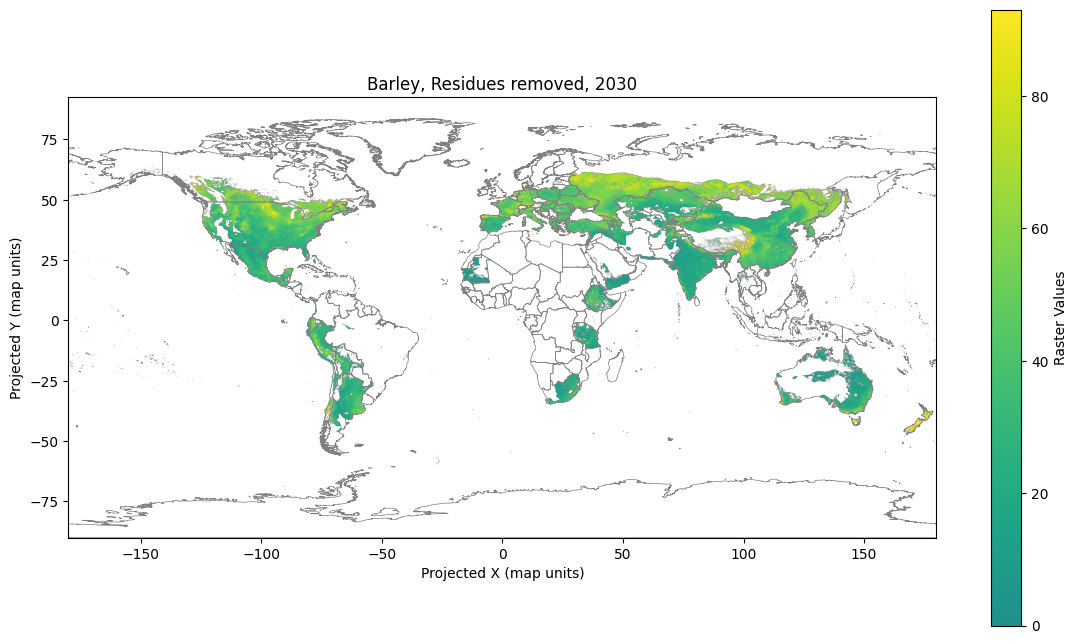

In [28]:
maplot.plot_raster_on_world_extremes_cutoff(results_check_roff_fp, "Barley, Residues removed, 2030", raster_band=15)

Raster has 680,131 unique values. Min: 9.39. Max: 92.95
Not using quantiles
All positives route (continuous)


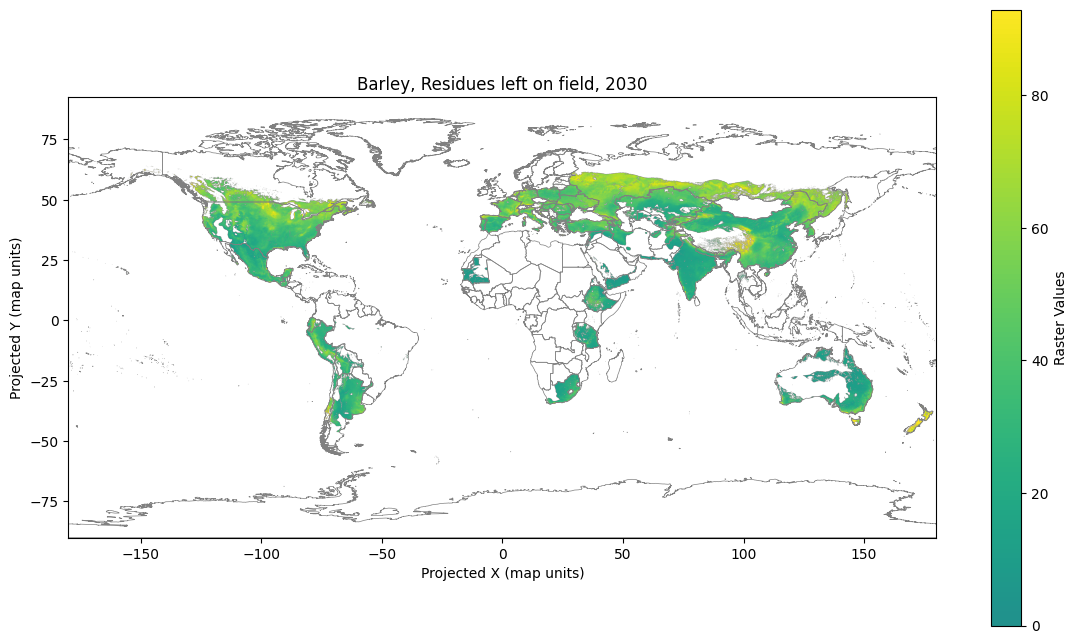

In [27]:
maplot.plot_raster_on_world_extremes_cutoff(results_check_ron_fp, "Barley, Residues left on field, 2030", raster_band=15)

TODO
- Run all annual crop scenarios
- re-run all permanent crop scenarios as there might be mistakes in land use derived rasters that assumed there was a 100% duplication between irrigated and non-irrigated

#### 2.1.2. Permanent Crops

In [2]:
permanent_crop_rothc_scenarios_fp = data_path("crops", "rothc_support","permcrops_baseline_rothc_scenarios.xlsx")

In [ ]:
# Running scenarios. This takes time!
rothC.run_rothc_crops_scenarios_from_excel(permanent_crop_rothc_scenarios_fp, force_new_files=True)

Could not determine dtype for column 10, falling back to string
Could not determine dtype for column 11, falling back to string


Running Permanent crop - Apple - irr
    Loading environmental data...
    Loading crop data...
    Running RothC...


C:\Users\loyola\OneDrive - World Wildlife Fund, Inc\Documents\203. Python projects\SBTN_Test\src\sbtn_leaf\data_loader.py:216: DataOrientationWarning: Row orientation inferred during DataFrame construction. Explicitly specify the orientation by passing `orient="row"` to silence this warning.
  table = pl.DataFrame(THERMAL_CLIMATE_ROWS, schema=["id", "TC_Name", "TC_Group"])


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Apple_irr_2030y_SOC.tif
Permanent crop - Apple - irr calculated. Continuing...


Running Permanent crop - Banana - irr
    Loading environmental data...
    Loading crop data...
    Running RothC...


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Banana_irr_2030y_SOC.tif
Permanent crop - Banana - irr calculated. Continuing...


Running Permanent crop - Cocoa - irr
    Loading environmental data...
    Loading crop data...
    Running RothC...


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Cocoa_irr_2030y_SOC.tif
Permanent crop - Cocoa - irr calculated. Continuing...


Running Permanent crop - Coconut - irr
    Loading environmental data...
    Loading crop data...
    Running RothC...


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Coconut_irr_2030y_SOC.tif
Permanent crop - Coconut - irr calculated. Continuing...


Running Permanent crop - Coffee - irr
    Loading environmental data...
    Loading crop data...
    Running RothC...


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Coffee_irr_2030y_SOC.tif
Permanent crop - Coffee - irr calculated. Continuing...


Running Permanent crop - Grapes - irr
    Loading environmental data...
    Loading crop data...
    Running RothC...


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Grapes_irr_2030y_SOC.tif
Permanent crop - Grapes - irr calculated. Continuing...


Running Permanent crop - Oil palm - irr
    Loading environmental data...
    Loading crop data...
    Running RothC...


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Oil palm_irr_2030y_SOC.tif
Permanent crop - Oil palm - irr calculated. Continuing...


Running Permanent crop - Olive - irr
    Loading environmental data...
    Loading crop data...
    Running RothC...


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Olive_irr_2030y_SOC.tif
Permanent crop - Olive - irr calculated. Continuing...


Running Permanent crop - Orange - irr
    Loading environmental data...
    Loading crop data...
    Running RothC...


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Orange_irr_2030y_SOC.tif
Permanent crop - Orange - irr calculated. Continuing...


Running Permanent crop - Apple - rf
    Loading environmental data...
    Loading crop data...
    Running RothC...


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Apple_rf_2030y_SOC.tif
Permanent crop - Apple - rf calculated. Continuing...


Running Permanent crop - Banana - rf
    Loading environmental data...
    Loading crop data...
    Running RothC...


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Banana_rf_2030y_SOC.tif
Permanent crop - Banana - rf calculated. Continuing...


Running Permanent crop - Cocoa - rf
    Loading environmental data...
    Loading crop data...
    Running RothC...


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Cocoa_rf_2030y_SOC.tif
Permanent crop - Cocoa - rf calculated. Continuing...


Running Permanent crop - Coconut - rf
    Loading environmental data...
    Loading crop data...
    Running RothC...


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Coconut_rf_2030y_SOC.tif
Permanent crop - Coconut - rf calculated. Continuing...


Running Permanent crop - Coffee - rf
    Loading environmental data...
    Loading crop data...
    Running RothC...


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Coffee_rf_2030y_SOC.tif
Permanent crop - Coffee - rf calculated. Continuing...


Running Permanent crop - Grapes - rf
    Loading environmental data...
    Loading crop data...
    Running RothC...


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Grapes_rf_2030y_SOC.tif
Permanent crop - Grapes - rf calculated. Continuing...


Running Permanent crop - Oil palm - rf
    Loading environmental data...
    Loading crop data...
    Running RothC...


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Oil palm_rf_2030y_SOC.tif
Permanent crop - Oil palm - rf calculated. Continuing...


Running Permanent crop - Olive - rf
    Loading environmental data...
    Loading crop data...
    Running RothC...


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Olive_rf_2030y_SOC.tif
Permanent crop - Olive - rf calculated. Continuing...


Running Permanent crop - Orange - rf
    Loading environmental data...
    Loading crop data...
    Running RothC...


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Orange_rf_2030y_SOC.tif
Permanent crop - Orange - rf calculated. Continuing...




Checking results...

In [4]:
apple_irr_results = LEAFs_dir()/"SOC/rasters/Apple_irr_2030y_SOC.tif"
apple_rf_results = LEAFs_dir()/"SOC/rasters/Apple_rf_2030y_SOC.tif"

In [ ]:
maplot.inspect_raster(apple_irr_results)

File: C:\Users\loyola\OneDrive - World Wildlife Fund, Inc\Documents\203. Python projects\SBTN_Test\LEAFs\SOC\rasters\Apple_irr_2030y_SOC.tif
Driver: GTiff
Width, Height: 4320, 2083
Number of Bands: 15
CRS: EPSG:4326
Bounds: BoundingBox(left=-179.99999999999997, bottom=-89.99999999999994, right=179.99999999999991, top=83.58333333333331)
Pixel Size: (0.0833333333333333, 0.0833333333333333)
No-data Value: nan

--- Raster Metadata ---
description: RothC model results for year 2030
long_name: Soil Organic Carbon
model: RothC rasterized vectorized
units: t C/ha
AREA_OR_POINT: Area

--- Band Information ---

Band 1:
  Data Type: float32
  Min Value: 7.7331671714782715
  Max Value: 166.87579345703125
  Mean Value: 45.55247116088867
  Standard Deviation: 17.2567138671875

Band 2:
  Data Type: float32
  Min Value: 8.822375297546387
  Max Value: 158.64405822753906
  Mean Value: 43.03664779663086
  Standard Deviation: 16.79792594909668

Band 3:
  Data Type: float32
  Min Value: 8.926424980163574
 

In [ ]:
maplot.inspect_raster(apple_rf_results)

File: C:\Users\loyola\OneDrive - World Wildlife Fund, Inc\Documents\203. Python projects\SBTN_Test\LEAFs\SOC\rasters\Apple_rf_2030y_SOC.tif
Driver: GTiff
Width, Height: 4320, 2083
Number of Bands: 15
CRS: EPSG:4326
Bounds: BoundingBox(left=-179.99999999999997, bottom=-89.99999999999994, right=179.99999999999991, top=83.58333333333331)
Pixel Size: (0.0833333333333333, 0.0833333333333333)
No-data Value: nan

--- Raster Metadata ---
description: RothC model results for year 2030
long_name: Soil Organic Carbon
model: RothC rasterized vectorized
units: t C/ha
AREA_OR_POINT: Area

--- Band Information ---

Band 1:
  Data Type: float32
  Min Value: 7.7331671714782715
  Max Value: 166.87579345703125
  Mean Value: 45.55051803588867
  Standard Deviation: 17.253765106201172

Band 2:
  Data Type: float32
  Min Value: 9.043563842773438
  Max Value: 158.4442138671875
  Mean Value: 43.507476806640625
  Standard Deviation: 16.481914520263672

Band 3:
  Data Type: float32
  Min Value: 9.753870964050293

Raster has 416,258 unique values. Min: 11.57. Max: 95.75
Using quantiles
All positives route (quantiles)


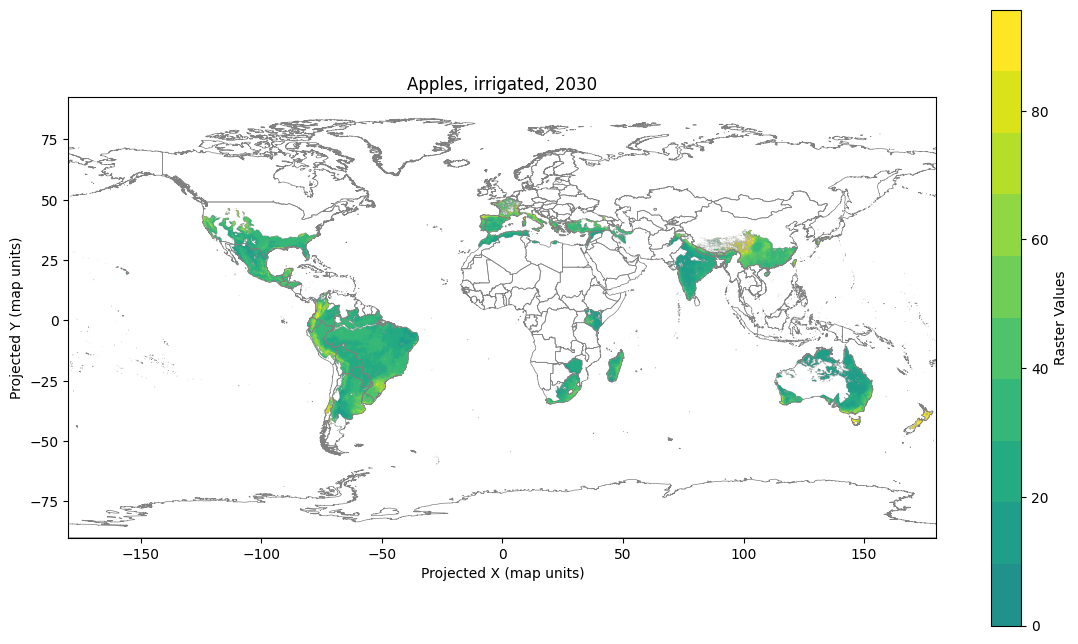

In [ ]:
maplot.plot_raster_on_world_extremes_cutoff(apple_irr_results, title="Apples, irrigated, 2030", quantiles=10, raster_band=15)

Raster has 414,715 unique values. Min: 15.64. Max: 90.41
Using quantiles
All positives route (quantiles)


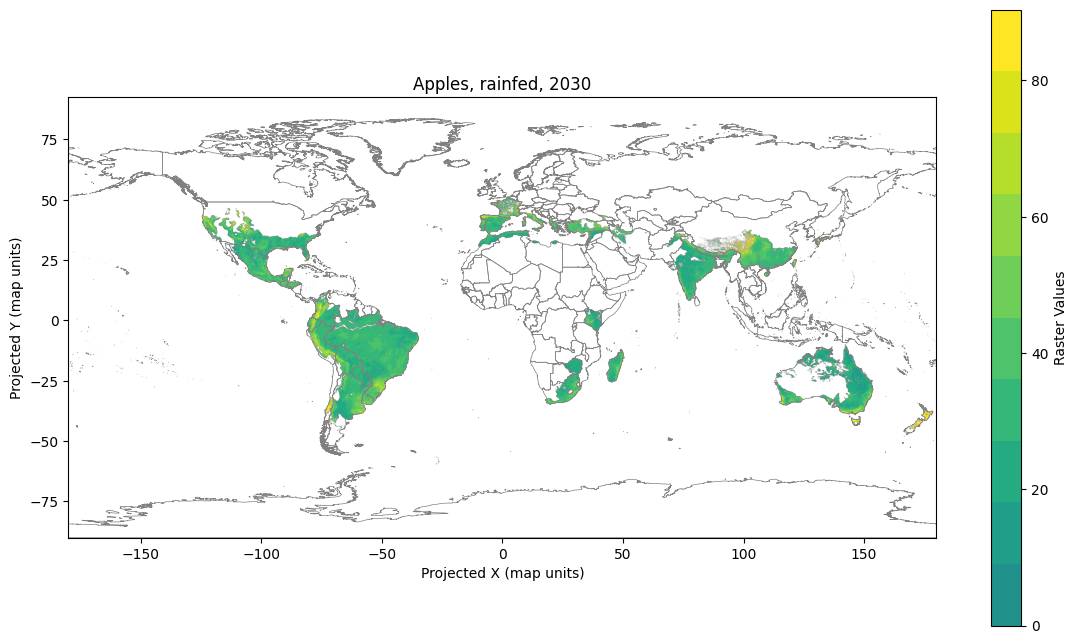

In [ ]:
maplot.plot_raster_on_world_extremes_cutoff(apple_rf_results, title="Apples, rainfed, 2030", quantiles=10, raster_band=15)

#### 2.1.3. Forests
All different forest and climate types, as well as the additional input required to run RothC model, have been included in [forest_baseline_rothc_scenarios](../data/forest/forest_baseline_rothc_scenarios.xlsx).


In [3]:
forest_rothc_scenario_fp = data_path("forest", "forest_baseline_rothc_scenarios.xlsx")

In [5]:
# Running scenarios. This takes time!
rothC.run_rothC_forest_scenarios_from_excel(forest_rothc_scenario_fp, force_new_files=False)

Forest - BRDC - Warm temperate dry already exists. Skipping...
Forest - BRDC - Warm temperate moist already exists. Skipping...
Forest - BRDC - Cold temperate dry already exists. Skipping...
Forest - BRDC - Cold temperate moist already exists. Skipping...
Forest - BRDC - Subtropical already exists. Skipping...
Forest - BRDC - Tropical already exists. Skipping...
Forest - BRDC - Boreal dry already exists. Skipping...
Forest - BRDC - Boreal moist already exists. Skipping...
Forest - NEEV - Boreal dry already exists. Skipping...
Forest - NEEV - Boreal moist already exists. Skipping...
Forest - NEEV - Cold temperate dry already exists. Skipping...
Forest - NEEV - Cold temperate moist already exists. Skipping...
Forest - NEEV - Subtropical already exists. Skipping...
Forest - NEEV - Tropical already exists. Skipping...
Running Forest - NEEV - Warm temperate dry
Loading environmental data...
Loading forest data...
Running RothC...


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

Forest - NEEV - Warm temperate dry calculated. Continuing...




Checking some of the results...

In [6]:
forest_soc_result = LEAFs_dir()/"SOC/rasters/BRDC_Warm temperate dry_2030y_SOC.tif"

In [ ]:
maplot.inspect_raster(forest_soc_result)

File: C:\Users\loyola\OneDrive - World Wildlife Fund, Inc\Documents\203. Python projects\SBTN_Test\LEAFs\SOC\rasters\BRDC_Warm temperate dry_2030y_SOC.tif
Driver: GTiff
Width, Height: 4320, 2083
Number of Bands: 15
CRS: EPSG:4326
Bounds: BoundingBox(left=-179.99999999999997, bottom=-89.99999999999994, right=179.99999999999991, top=83.58333333333331)
Pixel Size: (0.0833333333333333, 0.0833333333333333)
No-data Value: nan

--- Raster Metadata ---
description: Estimated RothC SOC stock in t C/ha until year 2030 for Broadleaf Deciduous - Cold temperate dry forest type
long_name: Soil Organic Carbon
model: RothC rasterized vectorized
units: t C/ha
AREA_OR_POINT: Area

--- Band Information ---

Band 1:
  Data Type: float32
  Min Value: 10.975362777709961
  Max Value: 169.39234924316406
  Mean Value: 58.132720947265625
  Standard Deviation: 18.82948875427246

Band 2:
  Data Type: float32
  Min Value: 11.94847583770752
  Max Value: 166.47434997558594
  Mean Value: 61.274349212646484
  Standard

Raster has 298,096 unique values. Min: 31.20. Max: 110.65
Using quantiles
All positives route (quantiles)


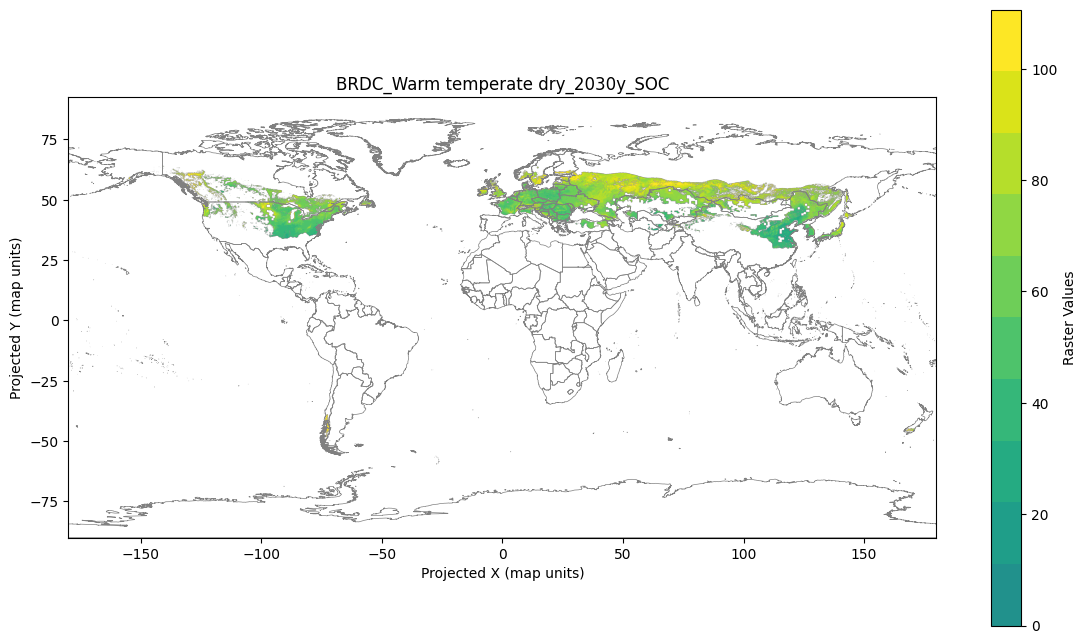

In [ ]:
maplot.plot_raster_on_world_extremes_cutoff(forest_soc_result, title="BRDC_Warm temperate dry_2030y_SOC", quantiles=10, raster_band=15)

#### 2.1.4. Grasslands
6 different scenarios have been generated for different combinations of animals present:
    1. Only cattle - average,
    2. Only cattle - high productivity,
    3. Only cattle - low productivity,
    4. Only sheep,
    5. Only goat,
    6. all animals - average productivity.

A csv with all different inputs can be found in [grassland_baseline_rothc_scenarios.csv](../data/grasslands/grassland_baseline_rothc_scenarios.csv). All inputs has been already created.

In [ ]:
# scenario filepaths
forest_rothc_scenario_fp = data_path("grasslands", "grassland_baseline_rothc_scenarios.xlsx")

In [ ]:
# Running scenarios. This takes time!
rothC.run_rothc_grassland_scenarios_from_excel(forest_rothc_scenario_fp, force_new_files=False)

Grassland - natural - sheep already exists. Skipping...
Grassland - natural - goat already exists. Skipping...
Grassland - natural - cattle_avg_sheep_goat already exists. Skipping...
Grassland - natural - cattle_avg already exists. Skipping...
Grassland - natural - cattle_hps already exists. Skipping...
Running Grassland - natural - cattle_lps
Loading environmental data...
Loading natural grassland data...
Running RothC...


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

Grassland - natural - cattle_lps calculated. Continuing...




Plotting some of them...

Raster has 1,203,714 unique values. Min: 22.92. Max: 114.26
Using quantiles
All positives route (quantiles)


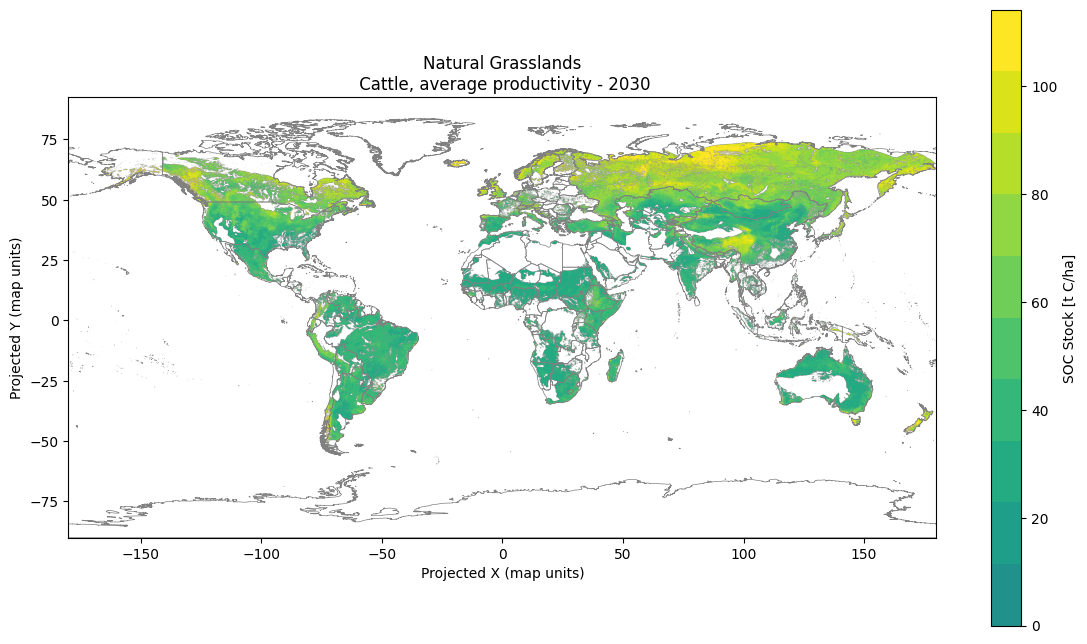

In [ ]:
maplot.plot_raster_on_world_extremes_cutoff("../LEAFs/SOC/rasters/natural_grassland_cattle_avg_2030y_SOC.tif", title="Natural Grasslands\n Cattle, average productivity - 2030", raster_band=15, quantiles=10, label_title="SOC Stock [t C/ha]")

Raster has 1,203,567 unique values. Min: 23.04. Max: 114.28
Using quantiles
All positives route (quantiles)


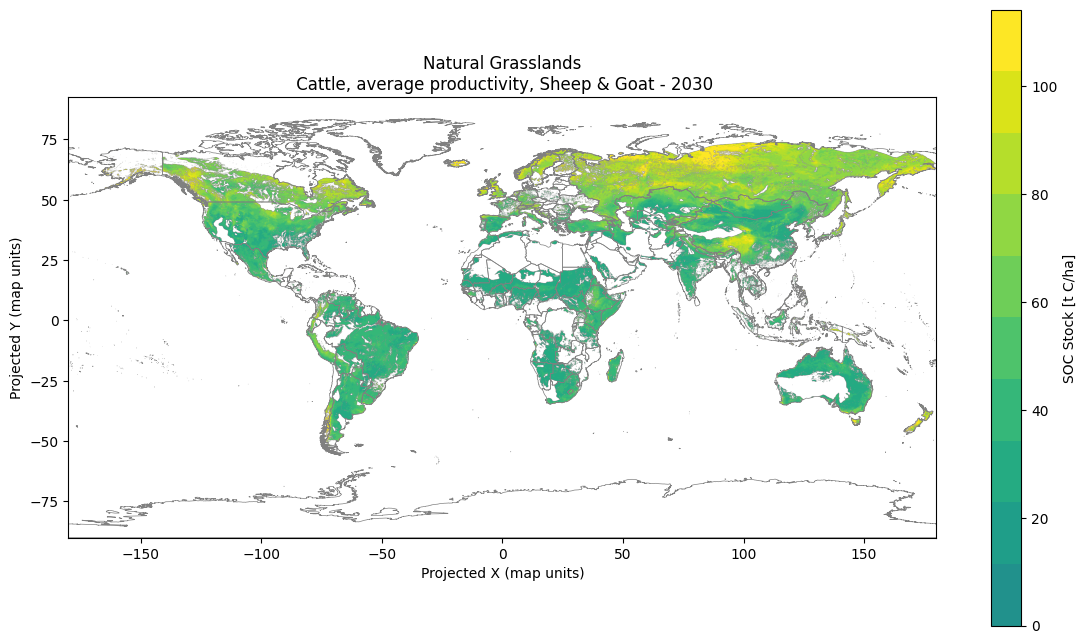

In [ ]:
maplot.plot_raster_on_world_extremes_cutoff("../LEAFs/SOC/rasters/natural_grassland_cattle_avg_sheep_goat_2030y_SOC.tif", title="Natural Grasslands\n Cattle, average productivity, Sheep & Goat - 2030", raster_band=15, quantiles=10, label_title="SOC Stock [t C/ha]")